In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [3]:
V = -1
N = 2
M = 5

min_V_J_ratio = -10
max_V_J_ratio = 10
max_mu_V_ratio = 10
resolution = 1000

mu_V_ratios = np.linspace(0, max_mu_V_ratio, resolution)
J_V_ratios = np.linspace(min_V_J_ratio, max_V_J_ratio, resolution)

mu_V_ratio_grid, J_V_ratio_grid = np.meshgrid(mu_V_ratios, J_V_ratios)

energy_gap_over_V_grid = np.zeros_like(mu_V_ratio_grid)

for i, mu_V_ratio in enumerate(mu_V_ratios):
    for j, J_V_ratio in enumerate(J_V_ratios):
        J = J_V_ratio * abs(V)
        mu = mu_V_ratio * abs(V)
        
        H = construct_initial_hamiltonian(N, M, mu) + construct_hamiltonian(N, M, J, V)
        
        eigenvalues, eigenvectors = exact_diagonalize(H)
        energy_gap = eigenvalues[1]-eigenvalues[0]
        energy_gap_over_V_grid[j, i] = energy_gap/abs(V)
        
        energy_gap_over_V_grid = energy_gap_over_V_grid

Text(0, 0.5, '$\\mu/|V|$')

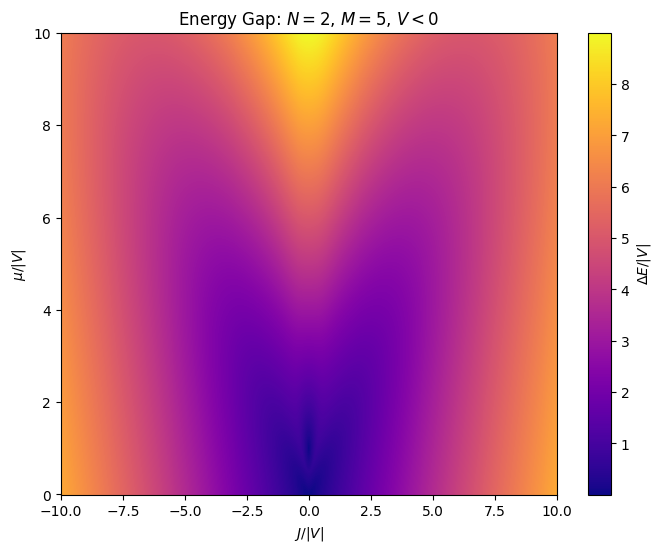

In [4]:
plt.figure(figsize = (8,6))

plt.pcolormesh(J_V_ratio_grid, mu_V_ratio_grid, energy_gap_over_V_grid, shading='auto', cmap='plasma')
plt.title(f"Energy Gap: $N={N}$, $M={M}$, $V<0$")
plt.colorbar(label="$\Delta E / |V|$")
plt.xlabel("$J/|V|$")
plt.ylabel("$\mu/|V|$")

In [5]:
energy_gap_over_V_df = pd.DataFrame(energy_gap_over_V_grid, index=J_V_ratios, columns=mu_V_ratios)
energy_gap_over_V_df.to_csv(f"energy_gap_over_V_resolution={resolution}.csv", index_label="J/V_ratios")